## Chocolate Sale

In [ ]:
import numpy as np
import pandas as pd

df =pd.read_csv('./chocolate_preprocessed.csv')
df

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,2016,63.0,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,2015,70.0,France,2.75,Blend,Togo
2,A. Morin,Atsane,2015,70.0,France,3.00,Blend,Togo
3,A. Morin,Akata,2015,70.0,France,3.50,Blend,Togo
4,A. Morin,Quilla,2015,70.0,France,3.50,Blend,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,2011,70.0,Austria,3.75,Blend,Peru
1791,Zotter,Congo,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,2011,62.0,Austria,3.25,Blend,India


In [74]:
df['Rating'] = df['Rating'] *20
#df['Rating'].max()
df.head()

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,2016,63.0,France,75.0,Blend,Sao Tome
1,A. Morin,Kpime,2015,70.0,France,55.0,Blend,Togo
2,A. Morin,Atsane,2015,70.0,France,60.0,Blend,Togo
3,A. Morin,Akata,2015,70.0,France,70.0,Blend,Togo
4,A. Morin,Quilla,2015,70.0,France,70.0,Blend,Peru


In [75]:
df['price(100g)'] = df['Cocoa Percent']*df['Rating']*25
df

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,price(100g)
0,A. Morin,Agua Grande,2016,63.0,France,75.0,Blend,Sao Tome,118125.0
1,A. Morin,Kpime,2015,70.0,France,55.0,Blend,Togo,96250.0
2,A. Morin,Atsane,2015,70.0,France,60.0,Blend,Togo,105000.0
3,A. Morin,Akata,2015,70.0,France,70.0,Blend,Togo,122500.0
4,A. Morin,Quilla,2015,70.0,France,70.0,Blend,Peru,122500.0
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,2011,70.0,Austria,75.0,Blend,Peru,131250.0
1791,Zotter,Congo,2011,65.0,Austria,60.0,Forastero,Congo,97500.0
1792,Zotter,Kerala State,2011,65.0,Austria,70.0,Forastero,India,113750.0
1793,Zotter,Kerala State,2011,62.0,Austria,65.0,Blend,India,100750.0


## Relationship between Price and Chocolate percent



<AxesSubplot:xlabel='Rating', ylabel='price(100g)'>

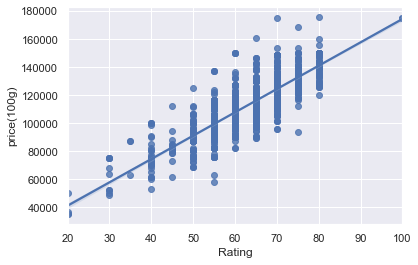

In [76]:
import seaborn as sns
sns.set_theme()
sns.regplot(x = df.Rating, y = df['price(100g)'])

### we are going to devide Chocolates by their Percent


In [77]:
dark_chocolates = df[df['Cocoa Percent']>70].reset_index()
good_chocolates = df[df['Cocoa Percent']<=70].reset_index()
dark_chocolates

,index,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,price(100g)
0,26,Adi,"Vanua Levu, Toto-A",2011,80.0,Fiji,65.0,Trinitario,Fiji,130000.0
1,27,Adi,Vanua Levu,2011,88.0,Fiji,70.0,Trinitario,Fiji,154000.0
2,28,Adi,"Vanua Levu, Ami-Ami-CA",2011,72.0,Fiji,70.0,Trinitario,Fiji,126000.0
3,32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",2011,75.0,Switzerland,75.0,Trinitario,Indonesia,140625.0
4,33,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",2010,75.0,Switzerland,55.0,Criollo,Madagascar,103125.0
...,...,...,...,...,...,...,...,...,...,...
790,1778,Zotter,Raw,2014,80.0,Austria,55.0,Blend,Other,110000.0
791,1779,Zotter,"Bocas del Toro, Cocabo Co-op",2012,72.0,Austria,70.0,Blend,Panama,126000.0
792,1784,Zotter,El Oro,2012,75.0,Austria,60.0,Forastero (Nacional),Ecuador,112500.0
793,1785,Zotter,Huiwani Coop,2012,75.0,Austria,60.0,"Criollo, Trinitario",Papua New Guinea,112500.0


### we should calculate the Price of Chocolate by their bean . Trinitario is the best kind of bean .


In [59]:
has_Trinitario = (dark_chocolates['Bean Type']=='Trinitario')
dark_chocolates.loc[has_Trinitario, 'price(100g)'] = dark_chocolates['price(100g)']*1.1
dark_chocolates

,index,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,price(100g)
0,26,Adi,"Vanua Levu, Toto-A",2011,80.0,Fiji,3.25,Trinitario,Fiji,7150.000
1,27,Adi,Vanua Levu,2011,88.0,Fiji,3.50,Trinitario,Fiji,8470.000
2,28,Adi,"Vanua Levu, Ami-Ami-CA",2011,72.0,Fiji,3.50,Trinitario,Fiji,6930.000
3,32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",2011,75.0,Switzerland,3.75,Trinitario,Indonesia,7734.375
4,33,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",2010,75.0,Switzerland,2.75,Criollo,Madagascar,5156.250
...,...,...,...,...,...,...,...,...,...,...
790,1778,Zotter,Raw,2014,80.0,Austria,2.75,Blend,Other,5500.000
791,1779,Zotter,"Bocas del Toro, Cocabo Co-op",2012,72.0,Austria,3.50,Blend,Panama,6300.000
792,1784,Zotter,El Oro,2012,75.0,Austria,3.00,Forastero (Nacional),Ecuador,5625.000
793,1785,Zotter,Huiwani Coop,2012,75.0,Austria,3.00,"Criollo, Trinitario",Papua New Guinea,5625.000


### Calculating the Price of dark Chocolates .


In [61]:
priceSum = dark_chocolates['price(100g)'].sum()
priceSum

4825299.375